<a href="https://colab.research.google.com/github/Ignat40/Machine-Learning/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ds = pd.read_csv('/content/sample_data/Position_Salaries.csv')
X = ds.iloc[:, 1:-1].values
y = ds.iloc[:, -1].values

Splitting the data

In [7]:
# no split as we wanna the leverage the maximum data between the business levels and salary

Feature Scaling

In [11]:
y = y.reshape(len(y), 1)


[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [23]:
 sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

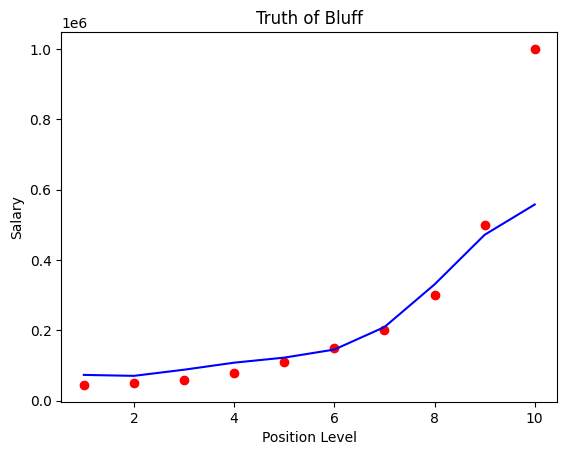

In [25]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
plt.title("Truth of Bluff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()